In [1]:
import pandas as pd

path = 'C:/Users/20244650/OneDrive - TU Eindhoven/files/others/Positions/Insight Lead/Case Study/Case/'
d1 = pd.read_excel(path + 'CNX Case Study Data Workbook 4.xlsx', sheet_name='Customer Survey Results')
d2 = pd.read_excel(path + 'CNX Case Study Data Workbook 4.xlsx', sheet_name='Account Interactions')

In [2]:
import pandas as pd

# Categorize NPS
def categorize_nps(score):
    if score <= 6:
        return 'Detractor'
    elif score <= 8:
        return 'Passive'
    else:
        return 'Promoter'

d1['NPS Category'] = d1['NPS Score'].apply(categorize_nps)

In [3]:
print(d1.shape)
d1.head(3)

(143, 8)


,Account Number,Interaction ID,Contact Date (mm/dd/yyyy),Overall Experience?,Issue Resolved?,NPS Score,Verbatims,NPS Category
0,9000081,1234513,2022-08-10 15:00:11,5,"No, but expect it to be resolved",10,Thank you!!,Promoter
1,9000005,1234504,2022-08-10 07:42:41,5,Yes,10,NaN,Promoter
2,9000023,1234627,2022-08-21 07:14:56,3,Yes,7,NaN,Passive


In [4]:
print(d2.shape)
d2.head(3)

(143, 8)


,Account Number,Interaction ID,Contact Date (mm/dd/yyyy),Advisor Role,Contact Channel,Self-Service Channel Used?,Contact Reason,Contact Resolution
0,9000020,1234643,2022-08-22 18:09:37,Tier 2,Voice,NaN,Add Services,Add Data
1,9000089,1234584,2022-08-17 07:16:13,Tier 1,Voice,No Attempt,Billing Question,Refund Account
2,9000007,1234512,2022-08-10 13:53:20,Tier 2,Voice,NaN,Add Services,Add Device


In [9]:
d2 = d2.drop(['Account Number', 'Contact Date (mm/dd/yyyy)'], axis=1)
# merge d1 and d2
df = pd.merge(d1, d2, on='Interaction ID', how='inner')

# Data exploration

In [8]:
d1['Account Number'].value_counts().sort_values()

Account Number
9000027    1
9000046    1
9000053    1
9000042    1
9000065    1
          ..
9000013    2
9000070    2
9000092    2
9000076    2
9000075    2
Name: count, Length: 92, dtype: int64

In [10]:
d1['Interaction ID'].value_counts().sort_values()

Interaction ID
1234513    1
1234569    1
1234627    1
1234637    1
1234528    1
          ..
1234550    1
1234629    1
1234595    1
1234525    1
1234631    1
Name: count, Length: 143, dtype: int64

In [12]:
d2['Account Number'].value_counts().sort_values()

Account Number
9000030    1
9000003    1
9000057    1
9000069    1
9000041    1
          ..
9000076    2
9000093    2
9000073    2
9000016    2
9000007    2
Name: count, Length: 92, dtype: int64

## Overall Experience?

In [351]:
df['Overall Experience?'].value_counts().sort_values()

Overall Experience?
4    15
2    19
5    30
1    37
3    42
Name: count, dtype: int64

In [353]:
df['Overall Experience?'].mean()

2.874125874125874

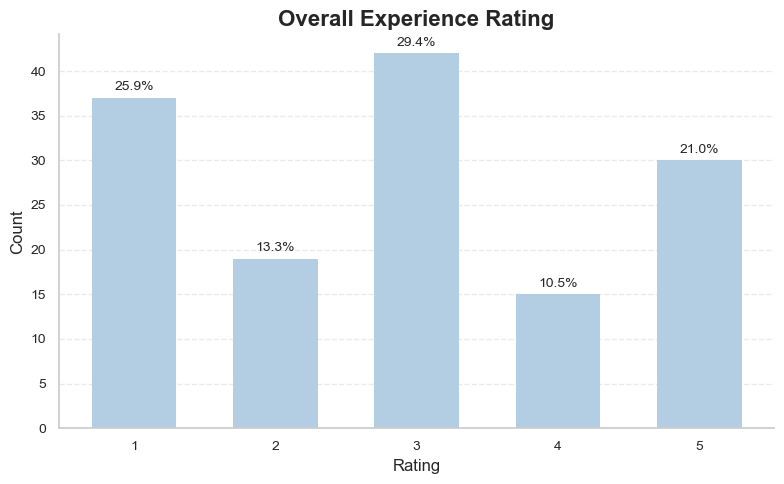

In [347]:
import pandas as pd
import matplotlib.pyplot as plt

# Count and sort
counts = df['Overall Experience?'].value_counts().sort_values(ascending=False)
total = counts.sum()

labels = counts.index
values = counts.values
percentages = [f"{(count / total):.1%}" for count in values]

# Use a soft pastel color palette
colors = '#b3cde3'

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(labels, values, color=colors, edgecolor='none', width=0.6)

# Annotate each bar with count and percentage
for bar, count, perc in zip(bars, values, percentages):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{perc}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='medium'
    )

# Styling
ax.set_title("Overall Experience Rating", fontsize=16, weight='bold')
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Remove clutter
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=10)
ax.set_axisbelow(True)
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

# Tight layout for clean spacing
plt.tight_layout()
plt.show()

## Issue Resolved?

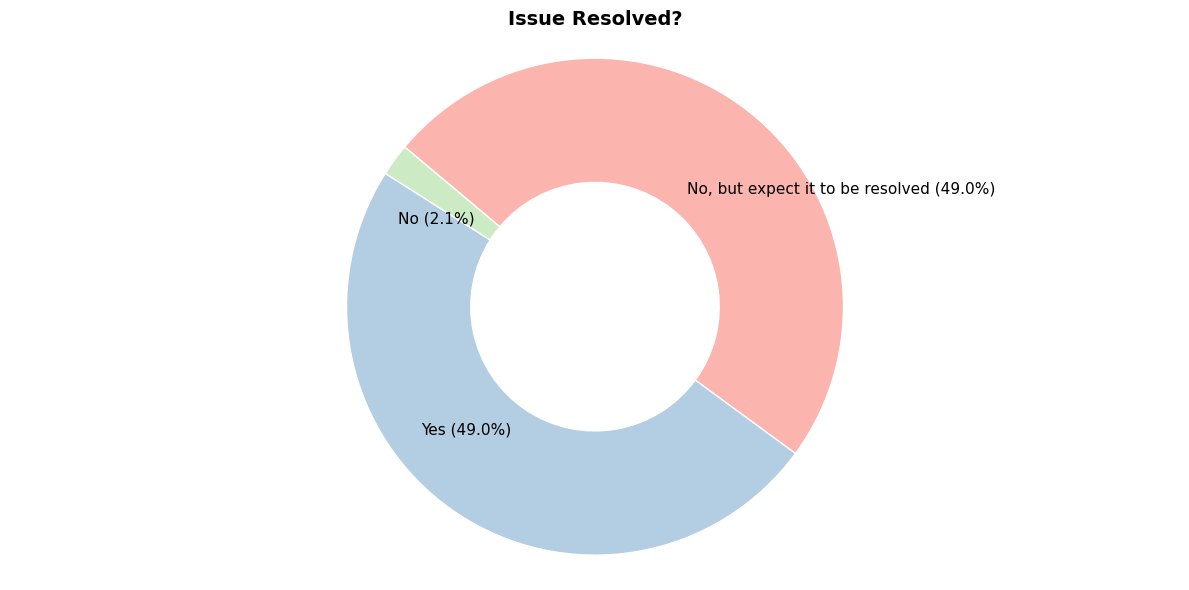

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Count and percentage data
counts = counts = d1['Issue Resolved?'].value_counts()
labels = counts.index
sizes = counts.values
total = sizes.sum()

# Combine category and percentage into a single label
combined_labels = [f"{label} ({count/total:.1%})" for label, count in zip(labels, sizes)]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
wedges, texts = ax.pie(
    sizes,
    labels=combined_labels,
    startangle=140,
    counterclock=False,
    colors=plt.cm.Pastel1.colors,
    wedgeprops=dict(width=0.5, edgecolor='white'),  # This creates the donut effect
    labeldistance=0.6
)

# Styling
plt.setp(texts, fontsize=11, fontweight='medium')
ax.set_title("Issue Resolved?", fontsize=14, weight='bold')
ax.axis('equal')  # Keep the chart circular
plt.tight_layout()
plt.show()

## NPS Score

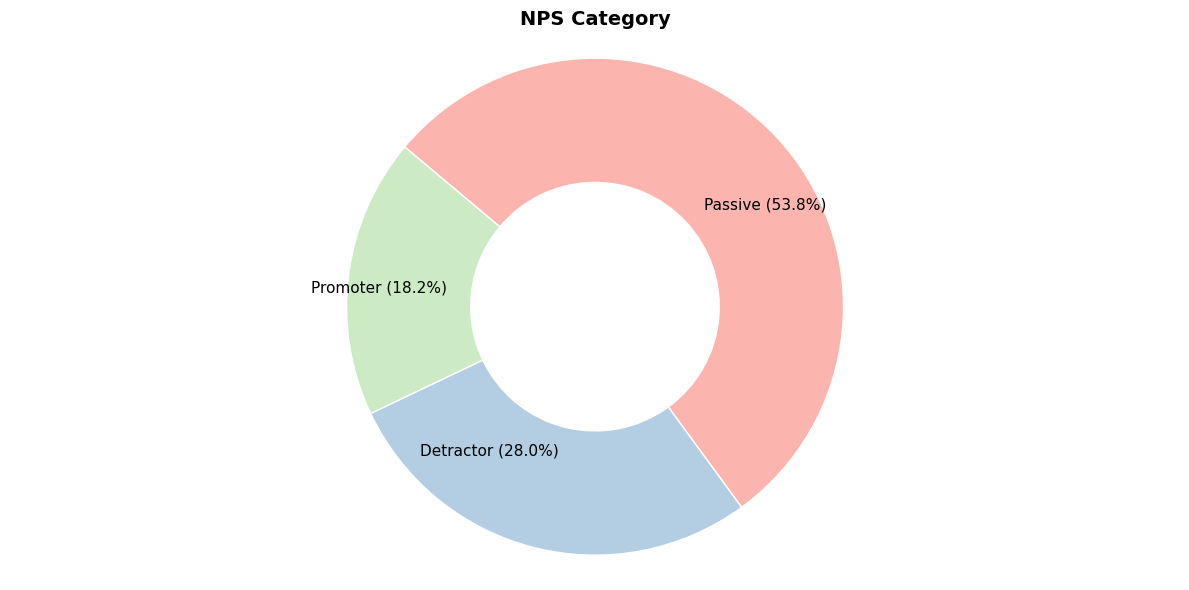

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Count and percentage data
counts = counts = d1['NPS Category'].value_counts()
labels = counts.index
sizes = counts.values
total = sizes.sum()

# Combine category and percentage into a single label
combined_labels = [f"{label} ({count/total:.1%})" for label, count in zip(labels, sizes)]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
wedges, texts = ax.pie(
    sizes,
    labels=combined_labels,
    startangle=140,
    counterclock=False,
    colors=plt.cm.Pastel1.colors,
    wedgeprops=dict(width=0.5, edgecolor='white'),  # This creates the donut effect
    labeldistance=0.6
)

# Styling
plt.setp(texts, fontsize=11, fontweight='medium')
ax.set_title("NPS Category", fontsize=14, weight='bold')
ax.axis('equal')  # Keep the chart circular
plt.tight_layout()
plt.show()

In [432]:
df['Advisor Role'].value_counts()

Advisor Role
Tier 1    74
Tier 2    69
Name: count, dtype: int64

## Contact Channel

In [434]:
df['Contact Channel'].value_counts()

Contact Channel
Voice    110
Chat      33
Name: count, dtype: int64

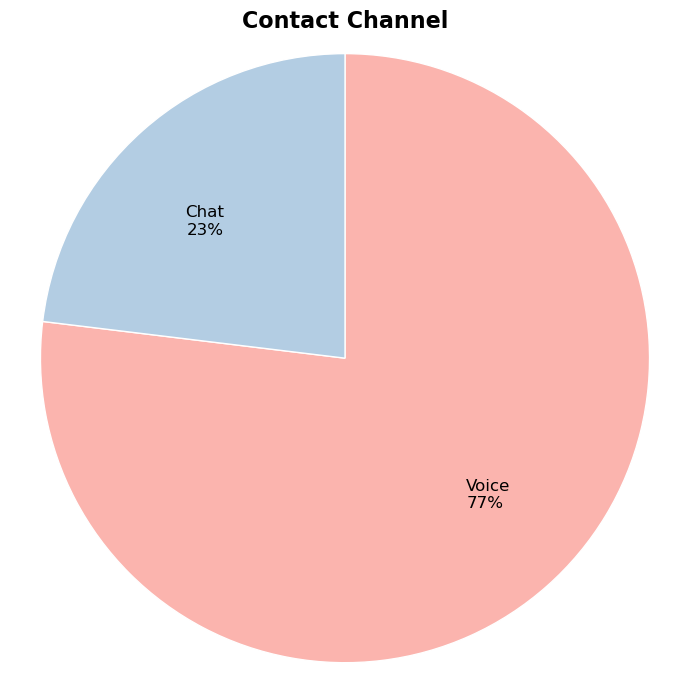

In [436]:
import matplotlib.pyplot as plt

# Data
labels = ['Voice', 'Chat']
counts = [110, 33]
total = sum(counts)
percentages = [f"{label}\n{count/total:.0%}" for label, count in zip(labels, counts)]

# Plot
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts = ax.pie(
    counts,
    labels=percentages,
    startangle=90,
    counterclock=False,
    colors=plt.cm.Pastel1.colors,  # Soft custom colors
    wedgeprops=dict(edgecolor='white'),
    labeldistance=0.6  # Move labels inside
)

# Style
plt.setp(texts, fontsize=12, fontweight='medium')
ax.set_title("Contact Channel", fontsize=16, weight='bold')
ax.axis('equal')  # Make pie circular

plt.tight_layout()
plt.show()

## Self-Service Channel Used?

In [452]:
df['Self-Service Channel Used?'].value_counts(dropna=False)

Self-Service Channel Used?
No Attempt    67
App           34
NaN           18
IVR           16
Web            8
Name: count, dtype: int64

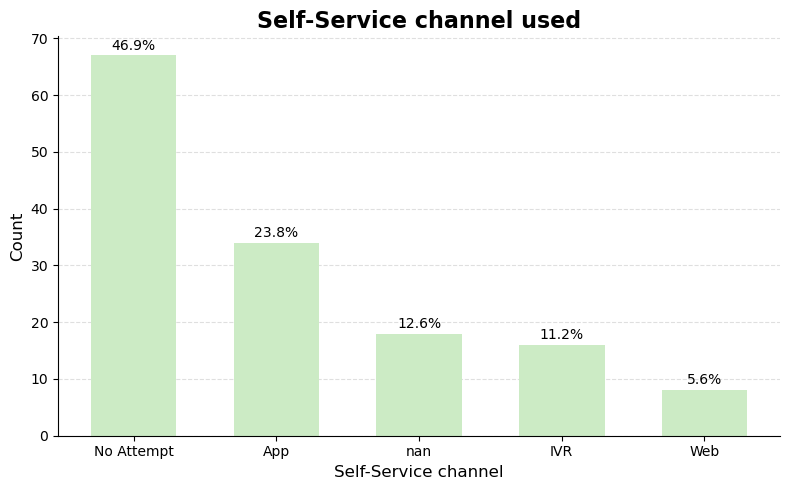

In [475]:
import pandas as pd
import matplotlib.pyplot as plt

# Count and sort
counts = df['Self-Service Channel Used?'].value_counts(dropna=False)
total = counts.sum()

labels = counts.index.astype(str)
values = counts.values
percentages = [f"{(count / total):.1%}" for count in values]

# Use a soft pastel color palette
colors = plt.cm.Pastel1(range(len(labels)))[2]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(labels, values, color=colors, edgecolor='none', width=0.6)

# Annotate each bar with count and percentage
for bar, count, perc in zip(bars, values, percentages):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{perc}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='medium'
    )

# Styling
ax.set_title("Self-Service channel used", fontsize=16, weight='bold')
ax.set_xlabel("Self-Service channel", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Remove clutter
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=10)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

# Tight layout for clean spacing
plt.tight_layout()
plt.show()

## Contact Reason

In [478]:
df['Contact Reason'].value_counts()

Contact Reason
Add Services        40
Billing Question    30
Make a Payment      21
Billing Dispute     17
Service Question    13
Cancel Service       8
Device Question      8
Change Plan          6
Name: count, dtype: int64

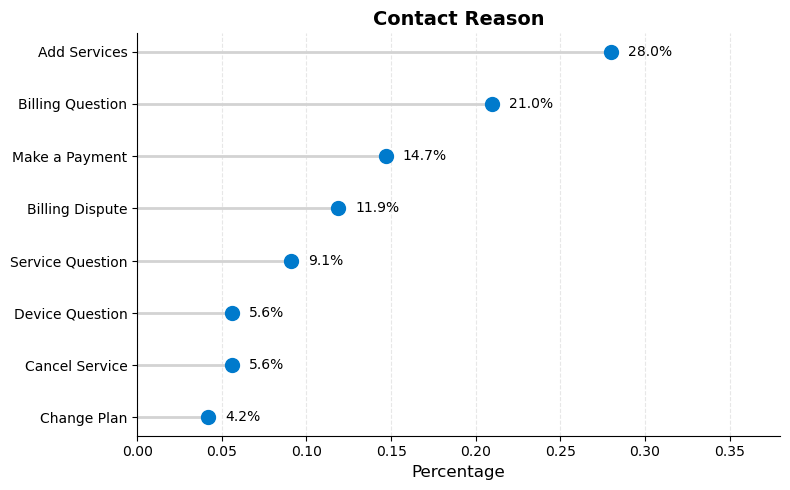

In [497]:
import pandas as pd
import matplotlib.pyplot as plt

# Count and calculate percentages
counts = df['Contact Reason'].value_counts(dropna=False)
total = counts.sum()
labels = counts.index.astype(str)
values = counts.values
percentages = [v / total for v in values]

# Sort for clean display
labels, percentages = zip(*sorted(zip(labels, percentages), key=lambda x: x[1], reverse=False))

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Draw "sticks"
ax.hlines(y=labels, xmin=0, xmax=percentages, color='lightgray', linewidth=2)

# Draw "candies"
ax.plot(percentages, labels, 'o', color='#007acc', markersize=10)

# Annotate with percentages
for x, y in zip(percentages, labels):
    ax.text(x + 0.01, y, f"{x:.1%}", va='center', fontsize=10)

# Style
ax.set_title("Contact Reason", fontsize=14, weight='bold')
ax.set_xlabel("Percentage", fontsize=12)
#ax.set_ylabel("Response", fontsize=12)

# Tidy layout
ax.set_xlim(0, max(percentages) + 0.1)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Contact Resolution

In [481]:
df['Contact Resolution'].value_counts()

Contact Resolution
Refund Account     39
Process Payment    19
Transfer           18
Disconnect         13
Add Data           13
Provide Info       11
Add Device         10
Activate Device     7
Explain Bill        6
Change Plan         4
Cancel Service      3
Name: count, dtype: int64

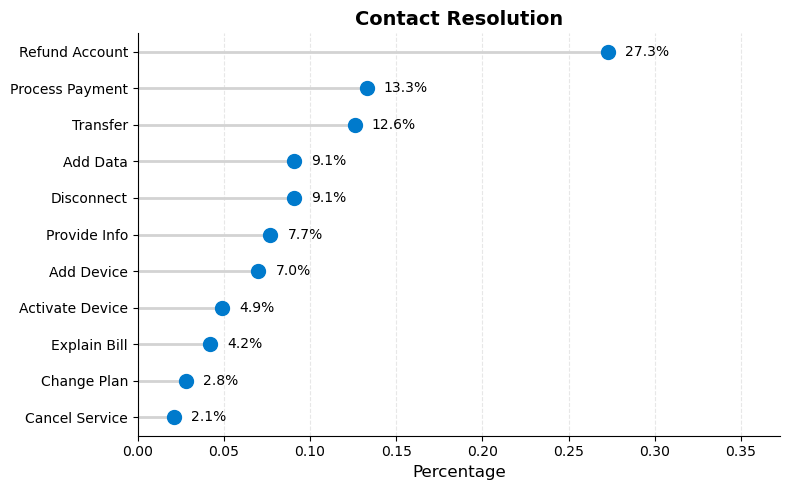

In [499]:
import pandas as pd
import matplotlib.pyplot as plt

# Count and calculate percentages
counts = df['Contact Resolution'].value_counts(dropna=False)
total = counts.sum()
labels = counts.index.astype(str)
values = counts.values
percentages = [v / total for v in values]

# Sort for clean display
labels, percentages = zip(*sorted(zip(labels, percentages), key=lambda x: x[1], reverse=False))

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Draw "sticks"
ax.hlines(y=labels, xmin=0, xmax=percentages, color='lightgray', linewidth=2)

# Draw "candies"
ax.plot(percentages, labels, 'o', color='#007acc', markersize=10)

# Annotate with percentages
for x, y in zip(percentages, labels):
    ax.text(x + 0.01, y, f"{x:.1%}", va='center', fontsize=10)

# Style
ax.set_title("Contact Resolution", fontsize=14, weight='bold')
ax.set_xlabel("Percentage", fontsize=12)
#ax.set_ylabel("Response", fontsize=12)

# Tidy layout
ax.set_xlim(0, max(percentages) + 0.1)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Repeat Contact Rate

## design new variable: contact frequency

In [29]:
account_counts_df = df['Account Number'].value_counts().reset_index()
account_counts_df.columns = ['Account Number', 'Count']
account_counts_df

,Account Number,Count
0,9000081,2
1,9000072,2
2,9000083,2
3,9000061,2
4,9000010,2
...,...,...
87,9000059,1
88,9000043,1
89,9000041,1
90,9000028,1


In [63]:
df_contact_frequency = pd.merge(emotion_detection, account_counts_df, on='Account Number', how='left')

## Repeat Contact Rate KPI

In [24]:
import pandas as pd

def analyze_repeat_contacts(df):
    # Get duplicate rows based on 'Account Number'
    duplicates = df[df['Account Number'].duplicated(keep=False)]
    
    # Sort by 'Account Number' descending
    duplicates_sort = duplicates.sort_values(by='Account Number', ascending=False)
    duplicates_sort.index = range(duplicates_sort.shape[0])
    
    # Prepare index ranges for pairwise comparison
    i = list(range(0, duplicates_sort.shape[0], 2))
    j = list(range(1, duplicates_sort.shape[0], 2))
    
    # Compute time differences between contact dates
    diff = [duplicates_sort['Contact Date (mm/dd/yyyy)'][j[x]] - 
            duplicates_sort['Contact Date (mm/dd/yyyy)'][i[x]] 
            for x in range(len(i))]

    # Extract absolute day differences
    day_list = [abs(x).days for x in diff]
    
    # Calculate the repeat contact rate
    repeat_contact_rate = sum(x <= 10 for x in day_list) / len(d1['Account Number'].unique())

    return diff, day_list, repeat_contact_rate

In [26]:
diff, day_list, repeat_contact_rate = analyze_repeat_contacts(d1)
repeat_contact_rate

0.5543478260869565

In [28]:
diff, day_list, repeat_contact_rate = analyze_repeat_contacts(d2)
repeat_contact_rate

0.5543478260869565

In [73]:
nr = d1['Account Number'].duplicated().sum()
print('the number of repeated contact is:', nr)

the number of repeated contact is: 51


## plot repeated contact rate

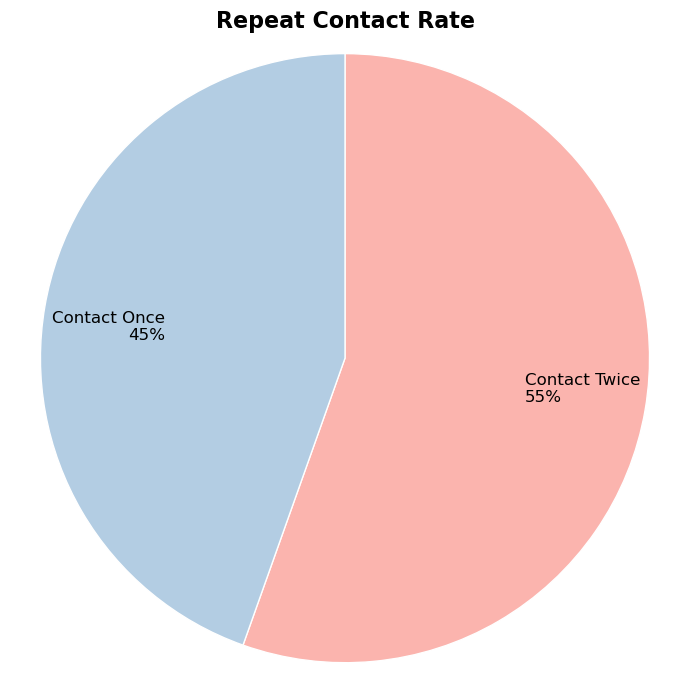

In [95]:
import matplotlib.pyplot as plt

# Data
labels = ['Contact Twice', 'Contact Once']
counts = [51, 41]
total = sum(counts)
percentages = [f"{label}\n{count/total:.0%}" for label, count in zip(labels, counts)]

# Plot
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts = ax.pie(
    counts,
    labels=percentages,
    startangle=90,
    counterclock=False,
    colors=plt.cm.Pastel1.colors,  # Soft custom colors
    wedgeprops=dict(edgecolor='white'),
    labeldistance=0.6  # Move labels inside
)

# Style
plt.setp(texts, fontsize=12, fontweight='medium')
ax.set_title("Repeat Contact Rate", fontsize=16, weight='bold')
ax.axis('equal')  # Make pie circular

plt.tight_layout()
plt.show()

## plot days

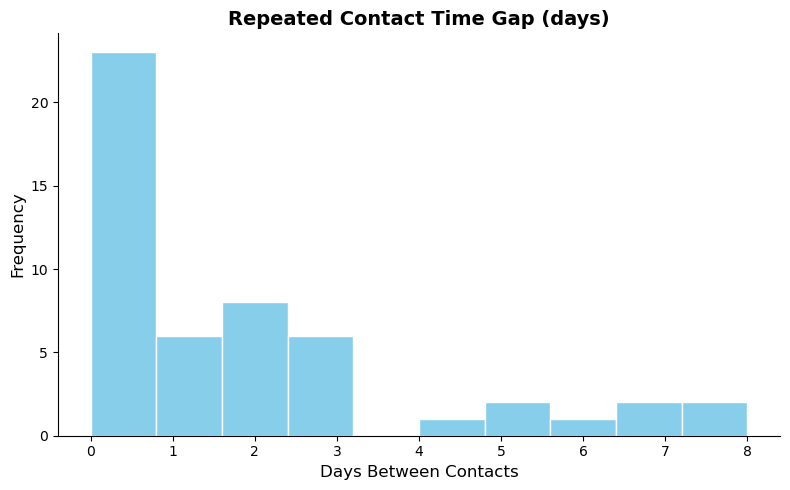

In [30]:
# Plot
plt.figure(figsize=(8, 5))
plt.hist(day_list, bins=10, edgecolor='white', color='skyblue')

# Style tweaks
plt.xlabel('Days Between Contacts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Repeated Contact Time Gap (days)', fontsize=14, weight='bold')

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Optional: tighten layout
plt.tight_layout()
plt.show()

# How does the overall customer experience impact brand perception?

'Overall Experience?' vs 'NPS Score: How likely are you to recommend Telco  Inc. to a friend or colleague?'

In [247]:
NS = df['NPS Category'].value_counts()
NS / sum(NS)

NPS Category
Passive      0.538462
Detractor    0.279720
Promoter     0.181818
Name: count, dtype: float64

## Correlation analysis

Use Spearman's rank correlation coefficient (Spearman’s rho) because:
- It measures monotonic relationships between two ranked variables.

- It does not assume linearity or normal distribution.

- It’s ideal for ordinal data and non-parametric correlation analysis.

In [125]:
import pandas as pd
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings('ignore')

# Function to compute Spearman correlation in a group
def compute_spearman(group):
    corr, pval = spearmanr(group['Overall Experience?'], group['NPS Score'])
    return pd.Series({'Spearman R': corr, 'p-value': pval})

# Apply the function by group
grouped_corr = d1.groupby('NPS Category').apply(compute_spearman)

print(grouped_corr)

              Spearman R   p-value
NPS Category                      
Detractor       0.328939  0.038220
Passive         0.436630  0.000072
Promoter        0.573877  0.002174


## Sankey diagram

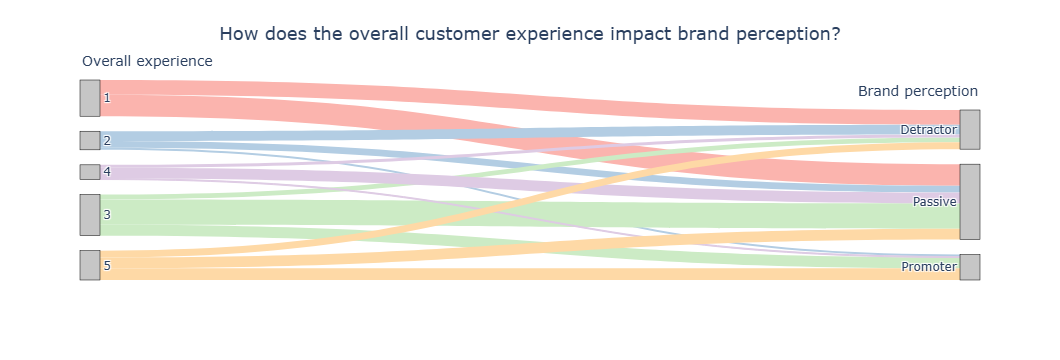

In [577]:
import pandas as pd
import plotly.graph_objects as go

# Example dataframe
df = pd.DataFrame({
    'Source': d1['Overall Experience?'],
    'Target':d1['NPS Category']
})

# Count frequencies of each Source-Target pair
link_df = df.groupby(['Source', 'Target']).size().reset_index(name='count')

# Define color map for all 5 source categories
source_colors = {
    1: '#fbb4ae',    
    2: '#b3cde3',    
    3: '#ccebc5',    
    4: '#decbe4',   
    5: '#fed9a6',   
}

# Map colors
colors = link_df['Source'].map(source_colors)

# Unique labels
labels = list(pd.unique(link_df['Source'].tolist() + link_df['Target'].tolist()))
label_to_index = {label: i for i, label in enumerate(labels)}

# Prepare source, target, values
sources = link_df['Source'].map(label_to_index)
targets = link_df['Target'].map(label_to_index)
values = link_df['count']

# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="rgba(160,160,160,0.6)"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    ))])

# Add title and annotations for axis labels
fig.update_layout(
    title=dict(
        text="How does the overall customer experience impact brand perception?",
        x=0.5,  # Center title
        xanchor='center',
        font=dict(size=18)
    ),
    font_size=12,
    margin=dict(l=80, r=80, t=80, b=80),
    annotations=[
        dict(
            x=0, y=1.15, showarrow=False,
            text="Overall experience", xref="paper", yref="paper",
            font=dict(size=14)
        ),
        dict(
            x=1, y=1, showarrow=False,
            text="Brand perception", xref="paper", yref="paper",
            font=dict(size=14)
        )
    ]
)

fig.show()

## Crosstab

In [341]:
pd.crosstab(d1['Overall Experience?'], d1['NPS Category'], normalize='index')

NPS Category,Detractor,Passive,Promoter
Overall Experience?,,,
1,0.405405,0.594595,0.000000
2,0.526316,0.368421,0.105263
3,0.119048,0.619048,0.261905
4,0.200000,0.733333,0.066667
5,0.233333,0.366667,0.400000


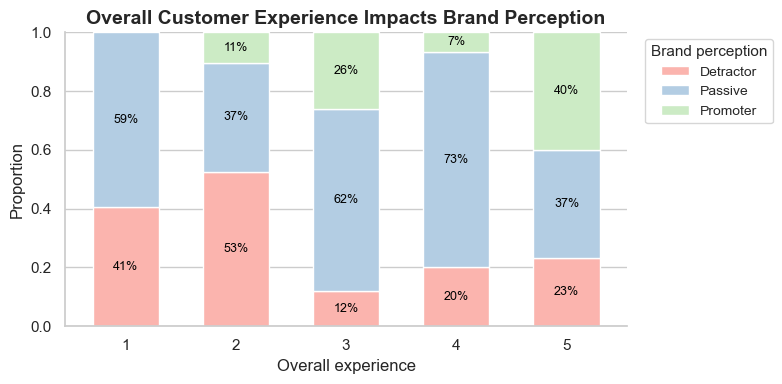

In [311]:
import pandas as pd
import matplotlib.pyplot as plt

# Cross-tab and normalize
crosstab = pd.crosstab(d1['Overall Experience?'], d1['NPS Category'], normalize='index')

# Sort index to ensure logical order (1–5)
crosstab = crosstab.sort_index()

# Define a clean custom color palette
colors = ['#fbb4ae', '#b3cde3', '#ccebc5']  # Red (Detractors), Yellow (Passives), Green (Promoters)

# Plot
ax = crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    color=colors,
    edgecolor='white',
    width=0.6
)

# Add percentage labels on each bar section
for i, col in enumerate(crosstab.columns):
    bottoms = crosstab.iloc[:, :i].sum(axis=1)
    for j, value in enumerate(crosstab[col]):
        if value > 0.03:  # Only show labels if section is large enough
            ax.text(
                j,
                bottoms.iloc[j] + value / 2,
                f"{value:.0%}",
                ha='center',
                va='center',
                color='black',
                fontsize=9,
            #    weight='bold'
            )

# Style adjustments
ax.set_title("Overall Customer Experience Impacts Brand Perception", fontsize=14, weight='bold')
ax.set_xlabel("Overall experience", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)
ax.set_ylim(0, 1)
ax.set_xticks(range(len(crosstab.index)))
ax.set_xticklabels(crosstab.index, fontsize=11, rotation=0)
ax.legend(title="Brand perception", bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, title_fontsize=11)
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

# Advisor Performance

## Advisor Role vs Overall Experience?

C:\Users\20244650\AppData\Local\Temp\ipykernel_4120\1139335668.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
C:\Users\20244650\AppData\Local\Temp\ipykernel_4120\1139335668.py:14: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(


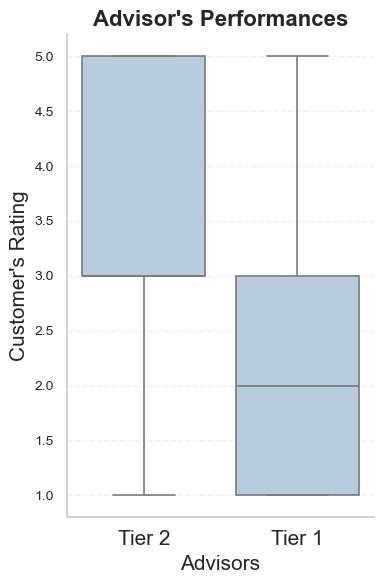

In [303]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame structure (replace with your actual data)
# df = pd.read_excel(...)  # Your dataset

# Ensure Seaborn style
sns.set(style="whitegrid")
custom_colors = ['#b3cde3']

# Plot
plt.figure(figsize=(4, 6))
ax = sns.boxplot(
    data=df,
    x='Advisor Role',   # Categorical variable
    y='Overall Experience?',             # Numeric variable
    palette=custom_colors,
    linewidth=1.2,
    fliersize=4,  # Size of outlier dots
)

# Improve aesthetics
ax.set_title("Advisor's Performances", fontsize=16, weight='bold')
ax.set_xlabel("Advisors", fontsize=15)
ax.set_ylabel("Customer's Rating", fontsize=15)

# Clean plot
sns.despine()  # Remove top/right spines
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

## Advisor Role vs Issue Resolved??

In [357]:
mapping = {
    'Yes': 1,
    'No, but expect it to be resolved': 0.5,
    'No': 0
}

df['Service Progress'] = df['Issue Resolved?'].map(mapping)

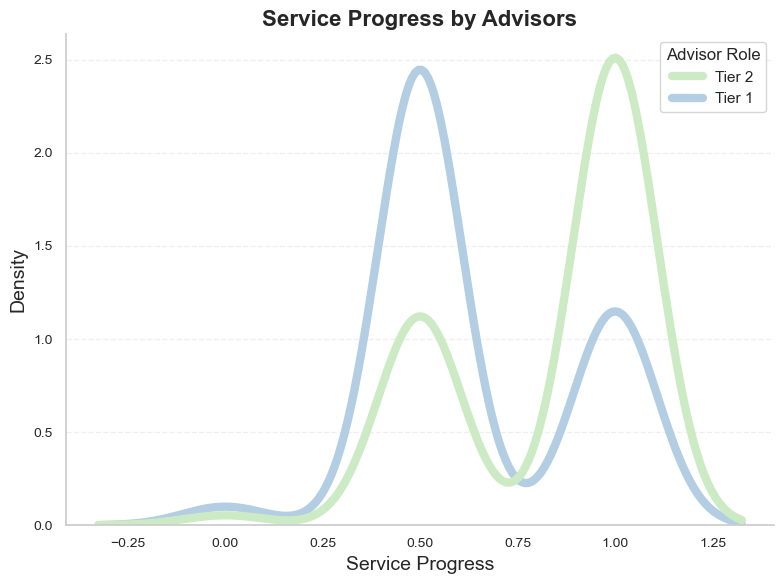

In [468]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for clean visuals
sns.set(style="whitegrid")
custom_palette = ['#ccebc5', '#b3cde3']  

# Plot
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(
    data=df,
    x='Service Progress',                    # numerical variable
    hue='Advisor Role', # categorical variable
#    fill=True,
    common_norm=False,
    palette=custom_palette,                   # clean, modern colors
    alpha=1,
    linewidth=6
)

# Style the plot
ax.set_title("Service Progress by Advisors", fontsize=16, weight='bold')
ax.set_xlabel("Service Progress", fontsize=14)
ax.set_ylabel("Density", fontsize=14)

# Remove clutter
sns.despine()
ax.xaxis.grid(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Contact Reason ~ Contact Resolution

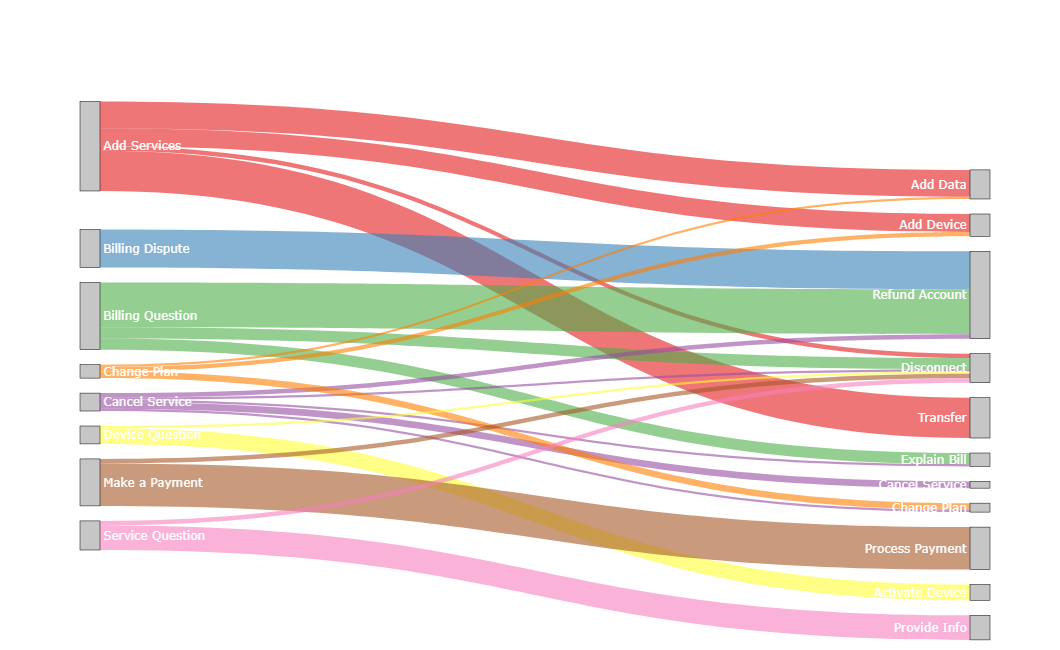

In [13]:
import pandas as pd
import plotly.graph_objects as go

# Create source and target columns with suffixes to distinguish them
data = pd.DataFrame({
    'Source': df['Contact Reason'].astype(str) + '_SRC',
    'Target': df['Contact Resolution'].astype(str) + '_TGT'
})

# Count frequencies of each Source-Target pair
link_df = data.groupby(['Source', 'Target']).size().reset_index(name='count')

# Define colors for each source category (with transparency)
source_colors = {
    'Add Services_SRC': 'rgba(228, 26, 28, 0.6)',     # #e41a1c
    'Billing Dispute_SRC': 'rgba(55, 126, 184, 0.6)', # #377eb8
    'Billing Question_SRC': 'rgba(77, 175, 74, 0.6)', # #4daf4a
    'Cancel Service_SRC': 'rgba(152, 78, 163, 0.6)',  # #984ea3
    'Change Plan_SRC': 'rgba(255, 127, 0, 0.6)',      # #ff7f00
    'Device Question_SRC': 'rgba(255, 255, 51, 0.6)', # #ffff33
    'Make a Payment_SRC': 'rgba(166, 86, 40, 0.6)',   # #a65628
    'Service Question_SRC': 'rgba(247, 129, 191, 0.6)'# #f781bf
}

# Map colors to the links based on Source
colors = link_df['Source'].map(lambda x: source_colors.get(x, 'rgba(160,160,160,0.3)'))

# Create ordered, unique list of labels
source_labels = link_df['Source'].unique().tolist()
target_labels = link_df['Target'].unique().tolist()
labels = source_labels + [t for t in target_labels if t not in source_labels]
label_to_index = {label: i for i, label in enumerate(labels)}

# Encode source and target indices
sources = link_df['Source'].map(label_to_index)
targets = link_df['Target'].map(label_to_index)
values = link_df['count']

# Set node x-positions (left = 0, right = 1)
x = [0 if '_SRC' in label else 1 for label in labels]

# Set node y-positions (spread evenly between 0.05 and 0.95 to avoid clipping)
y = [0.5 * (i / (len(labels) - 1)) for i in range(len(labels))]

# Clean label display (remove _SRC/_TGT)
clean_labels = [label.replace('_SRC', '').replace('_TGT', '') for label in labels]

# Build the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=clean_labels,
        color="rgba(160,160,160,0.6)",
        x=x,
        y=y
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    )
)])

# Update layout
fig.update_layout(
    width=1000,
    height=650,
    title=dict(
        text="How Does Contact Reason Lead to Contact Resolution",
        x=0.5,
        xanchor='center',
        font=dict(size=18, color='white')  # ✅ Title in white
    ),
    font=dict(
        size=12,
        color='white'  # ✅ Node labels and general font color
    ),
    paper_bgcolor='rgba(0,0,0,0)',   # Transparent background
    plot_bgcolor='rgba(0,0,0,0)',    # Transparent plot area
    margin=dict(l=80, r=80, t=80, b=100),
    annotations=[
        dict(
            x=-0.004, y=1.002, showarrow=False,
            text="Contact Reason", xref="paper", yref="paper",
            font=dict(size=14, color='white')  # ✅ Annotation label
        ),
        dict(
            x=1.014, y=0.86, showarrow=False,
            text="Contact Resolution", xref="paper", yref="paper",
            font=dict(size=14, color='white')  # ✅ Annotation label
        )
    ]
)

# Show the plot
fig.show()

# Text analysis

In [242]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Replace with your text column
texts = df['Verbatims'].dropna().astype(str)

# Use bigrams
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))
X = vectorizer.fit_transform(texts)

# Word frequencies
vocab = vectorizer.get_feature_names_out()
word_freq = X.sum(axis=0).A1

# Create DataFrame
freq_df = pd.DataFrame({'phrase': vocab, 'count': word_freq})
freq_df = freq_df.sort_values(by='count', ascending=False)

## Word cloud

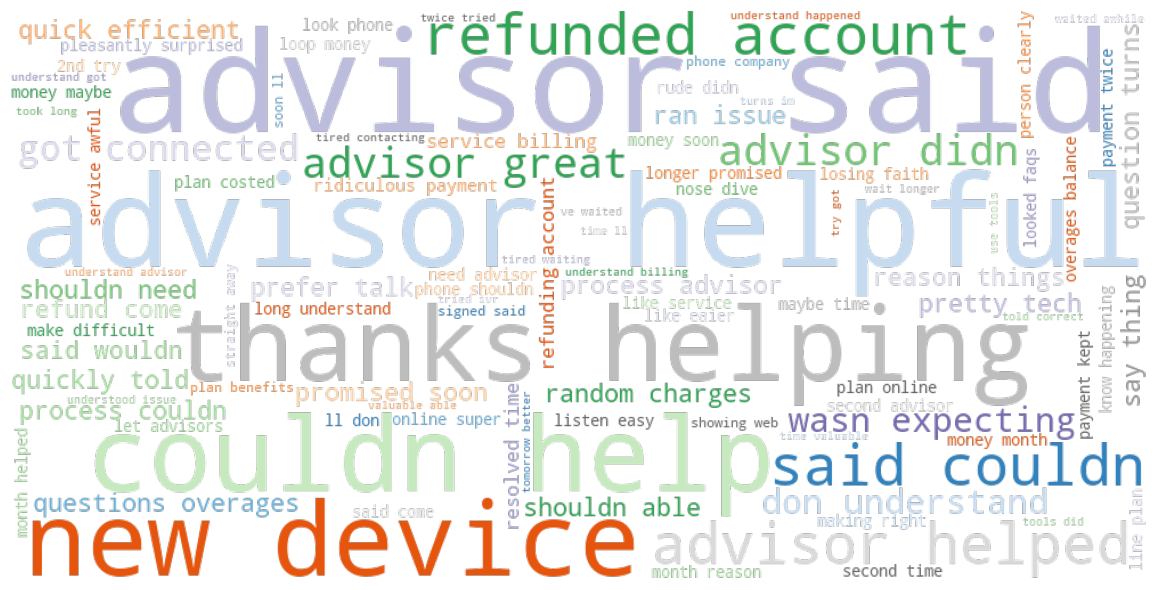

In [264]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create dictionary from freq_df (phrase: count)
word_freq_dict = dict(zip(freq_df['phrase'], freq_df['count']))

# Generate transparent word cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color=None,      # 🔁 Transparent background
    mode='RGBA',                # 🔁 Required for transparency
    colormap='tab20c',
    prefer_horizontal=0.9,
    max_words=100,
    contour_color='steelblue',
    contour_width=1
).generate_from_frequencies(word_freq_dict)

# Plot with transparent figure
plt.figure(figsize=(12, 6), facecolor='none')  # 🔁 Transparent canvas
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

## Sentiment analysis 

In [40]:
print(df['Verbatims'].isna().sum())
print(len(df['Verbatims']))

print('Missing value ratio is:', df['Verbatims'].isna().sum() / len(df['Verbatims']))

49
143
Missing value ratio is: 0.34265734265734266


In [41]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

verbatims = df['Verbatims'].dropna().reset_index(drop=True)
# Apply sentiment analysis using TextBlob
sentiment_scores = verbatims.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Combine into a DataFrame
sentiment_df = pd.DataFrame({
    'Verbatim': verbatims,
    'Sentiment Score': sentiment_scores
})

sentiment_df = sentiment_df.rename(columns={'Verbatim': 'Verbatims'})
# Classify sentiment scores into Positive / Neutral / Negative categories
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification
sentiment_df['Sentiment Category'] = sentiment_df['Sentiment Score'].apply(classify_sentiment)
sentiment_df

,Verbatims,Sentiment Score,Sentiment Category
0,Thank you!!,0.00,Neutral
1,Had questions about overages and my balance,0.00,Neutral
2,thanks for answering my questions,0.20,Positive
3,Thanks for refunding my account,0.20,Positive
4,Calling back,0.00,Neutral
...,...,...,...
89,Did my payment go through twice? I tried throu...,0.00,Neutral
90,I couldn't find where to go.,0.00,Neutral
91,it's 2022…,0.00,Neutral
92,Getting tired of contacting TelCo. for everyth...,-0.40,Negative


In [44]:
sentiment_df['Sentiment Category'].value_counts()

Sentiment Category
Neutral     47
Positive    31
Negative    16
Name: count, dtype: int64

In [240]:
df['Sentiment Score'].mean()

0.010137468914064657

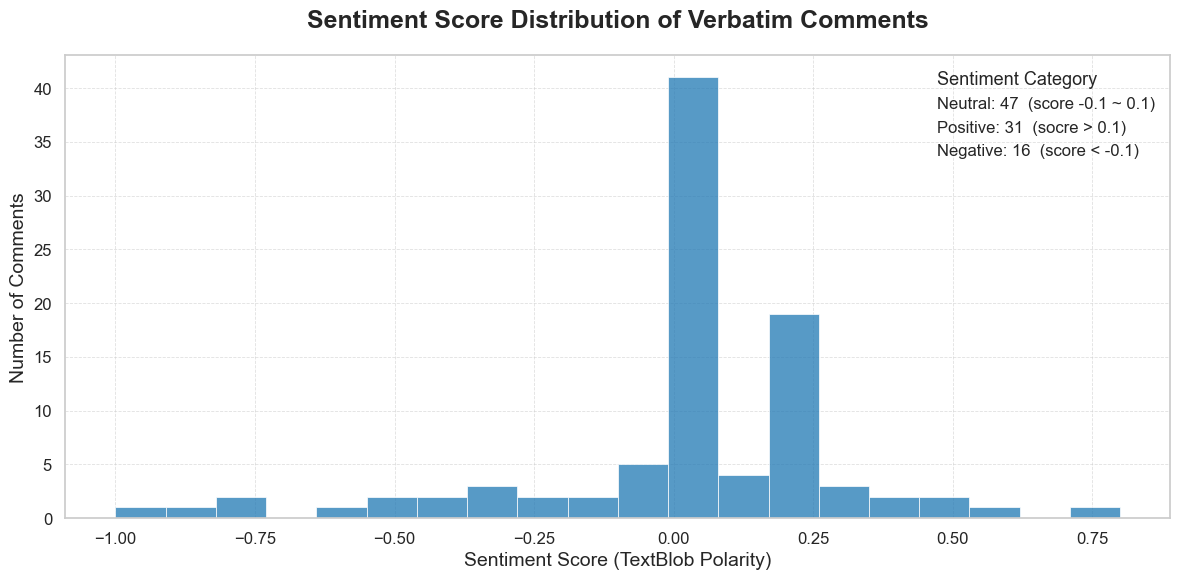

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Set a clean, consistent Seaborn style
sns.set(style="whitegrid", font_scale=1.1)

# Create the figure and histogram
plt.figure(figsize=(12, 6))
sns.histplot(
    data=sentiment_df,
    x='Sentiment Score',
    bins=20,
    color="#1f78b4",
    edgecolor="white",
    linewidth=0.5
)

# Title and axis styling
plt.title("Sentiment Score Distribution of Verbatim Comments", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Sentiment Score (TextBlob Polarity)", fontsize=14)
plt.ylabel("Number of Comments", fontsize=14)

# Tick and grid customization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)

# Text-only custom legend
legend_elements = [
    Line2D([0], [0], linestyle='None', marker='', label='Neutral: 47  (score -0.1 ~ 0.1)'),
    Line2D([0], [0], linestyle='None', marker='', label='Positive: 31  (socre > 0.1)'),
    Line2D([0], [0], linestyle='None', marker='', label='Negative: 16  (score < -0.1)')
]

plt.legend(
    handles=legend_elements,
    loc='upper right',
    frameon=False,
    title="Sentiment Category",
    title_fontsize=13,
    fontsize=12,
    handlelength=0,
    handletextpad=0,
    alignment='left'  # <-- Left-align text (Matplotlib 3.6+)
)

# Final layout adjustments
plt.tight_layout()
plt.show()

In [49]:
df_Sentiment_Score = pd.merge(df, sentiment_df, on='Verbatims', how='left')

## Topic models

In [281]:
# 📦 Install necessary packages if not already installed
# pip install pandas scikit-learn nltk pyLDAvis

import pandas as pd
import re
import nltk
import warnings
import pyLDAvis
#import pyLDAvis.sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords

# 🔧 Setup
warnings.filterwarnings("ignore")
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 📥 Load Verbatims (replace this with your actual DataFrame)
verbatims = df_Sentiment_Score['Verbatims'].dropna().astype(str)

# 🧹 Preprocess text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # remove punctuation & lowercase
    return ' '.join([word for word in text.split() if word not in stop_words])

verbatims_clean = verbatims.apply(clean_text)

# 📊 Vectorize the cleaned text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(verbatims_clean)

# 🧠 Fit LDA model
num_topics = 2  # change this to your preferred number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=2025)
lda.fit(doc_term_matrix)

# 🔍 Display top words per topic
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Set number of words per topic here
no_top_words = 8
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words=no_top_words)


Topic 1:
advisor, understand, dont, telco, plan, helpful, got, said

Topic 2:
thanks, time, im, money, issue, better, answer, account


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20244650\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Emotion Detection (Beyond Sentiment))

In [59]:
# Load the newly uploaded Excel file and re-run emotion detection with expanded lexicon
import pandas as pd
import re
from collections import Counter

# Expanded emotion lexicon
emotion_lexicon = {
    'joy': [
        'thank', 'thanks', 'happy', 'great', 'awesome', 'love', 'fantastic',
        'good', 'excellent', 'pleasant', 'amazing', 'satisfied', 'grateful',
        'helpful', 'smooth', 'resolved', 'refunded', 'appreciate', 'quickly'
    ],
    'trust': [
        'advisor', 'helpful', 'supportive', 'clear', 'professional', 'reliable',
        'fixed', 'trust', 'respect', 'handled', 'explained', 'guided'
    ],
    'anger': [
        'angry', 'hate', 'mad', 'furious', 'rude', 'annoyed', 'issue', 'problem',
        'bad', 'disrespect', 'frustrated', 'upset', 'ignored', 'overcharged',
        'lied', 'disgusted', 'terrible', 'incompetent'
    ],
    'sadness': [
        'disappointed', 'sad', 'unhappy', 'depressed', 'cancel', 'lost', 'sorry',
        'quit', 'leaving', 'confused', 'missed', 'letdown', 'unclear'
    ],
    'fear': [
        'worried', 'afraid', 'scared', 'anxious', 'concerned', 'hesitant', 'doubt',
        'nervous', 'risky', 'unsure', 'tight', 'stress'
    ],
    'anticipation': [
        'waiting', 'hope', 'expect', 'pending', 'soon', 'delay',
        'trying', 'watching', 'eventually', 'next', 'see'
    ],
    'disgust': [
        'gross', 'disgust', 'awful', 'terrible', 'horrible', 'nasty', 'pathetic',
        'worthless', 'annoying', 'garbage', 'broken'
    ],
    'surprise': [
        'surprised', 'unexpected', 'shocked', 'amazed', 'suddenly', 'wow', 'really',
        'pleasantly'
    ]
}

# Extract and clean verbatims
verbatims = df_Sentiment_Score['Verbatims'].dropna().astype(str)

def extract_emotions(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    emotion_counts = Counter()
    for word in text.split():
        for emotion, keywords in emotion_lexicon.items():
            if word in keywords:
                emotion_counts[emotion] += 1
    return dict(emotion_counts)

# Apply emotion detection
emotion_results = verbatims.apply(extract_emotions)

# Format results into a dataframe
emotion_summary = []
for i, row in enumerate(emotion_results):
    top_emotion = max(row.items(), key=lambda x: x[1])[0] if row else None
    emotion_summary.append({
        'Verbatim': verbatims.iloc[i],
        'Dominant Emotion': top_emotion,
        'Emotion Breakdown': row
    })

emotion_df = pd.DataFrame(emotion_summary)

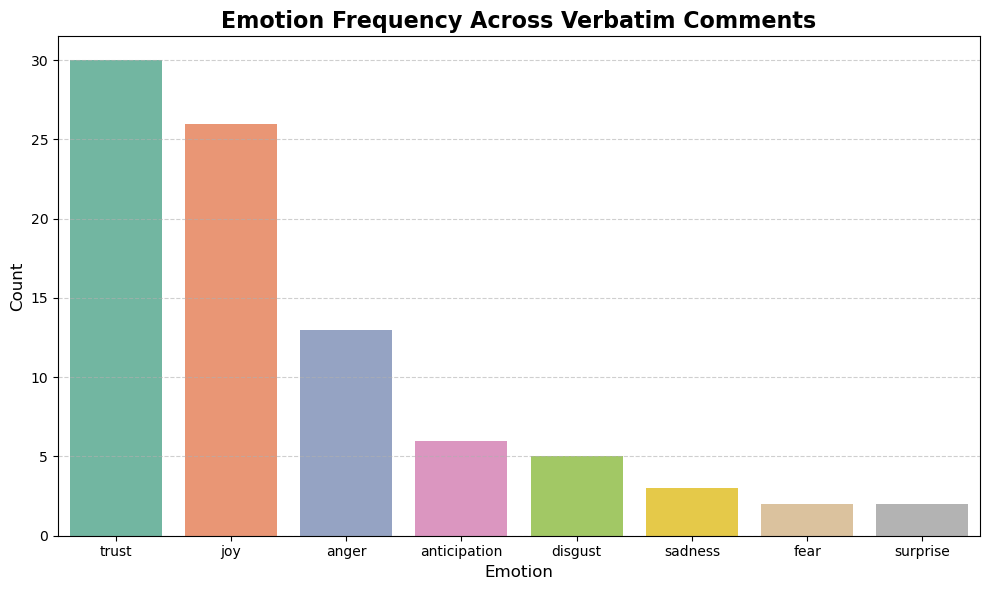

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Flatten all emotion breakdowns into a single Counter
all_emotion_counts = Counter()
for breakdown in emotion_df['Emotion Breakdown']:
    all_emotion_counts.update(breakdown)

# Convert to a DataFrame for plotting
emotion_freq_df = pd.DataFrame.from_dict(all_emotion_counts, orient='index', columns=['Count'])
emotion_freq_df = emotion_freq_df.sort_values(by='Count', ascending=False).reset_index()
emotion_freq_df.columns = ['Emotion', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=emotion_freq_df, x='Emotion', y='Count', palette='Set2')
plt.title("Emotion Frequency Across Verbatim Comments", fontsize=16, fontweight='bold')
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [61]:
emotion_df = emotion_df.rename(columns={'Verbatim': 'Verbatims'})
emotion_detection = pd.merge(df_Sentiment_Score, emotion_df, on='Verbatims', how='left')

# Potential drivers of low customer satisfaction and high contact volume.

## low customer satisfaction

### Box plots

In [53]:
df.groupby('Contact Reason')['Overall Experience?'].mean().sort_values()

Contact Reason
Change Plan         1.666667
Add Services        2.125000
Service Question    2.307692
Cancel Service      2.875000
Billing Question    2.966667
Billing Dispute     3.058824
Make a Payment      4.190476
Device Question     4.250000
Name: Overall Experience?, dtype: float64

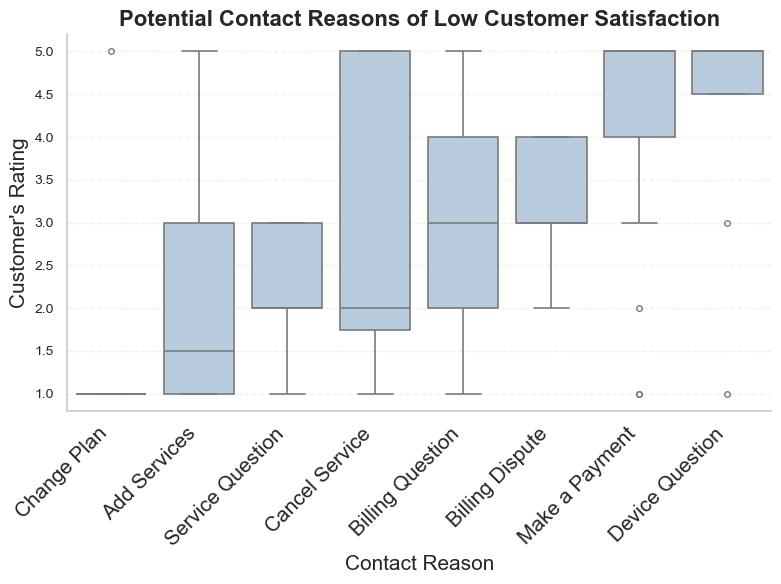

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Seaborn style
sns.set(style="whitegrid")

# ➕ Step 1: Compute means per category
mean_order = (
    df.groupby('Contact Reason')['Overall Experience?']
    .mean()
    .sort_values()
    .index
)

# ➕ Step 2: Plot sorted boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=df,
    x='Contact Reason',
    y='Overall Experience?',
    order=mean_order,           # 🔁 Sort by mean
    color='#b3cde3',
    linewidth=1.2,
    fliersize=4,
)

# Labels and formatting
ax.set_title("Potential Contact Reasons of Low Customer Satisfaction", fontsize=16, weight='bold')
ax.set_xlabel("Contact Reason", fontsize=15)
ax.set_ylabel("Customer's Rating", fontsize=15)
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [21]:
df.groupby('Contact Resolution')['Overall Experience?'].mean().sort_values()

Contact Resolution
Disconnect         1.000000
Transfer           1.000000
Change Plan        2.000000
Provide Info       2.545455
Cancel Service     2.666667
Add Device         3.000000
Refund Account     3.205128
Add Data           3.230769
Explain Bill       3.333333
Process Payment    4.526316
Activate Device    4.714286
Name: Overall Experience?, dtype: float64

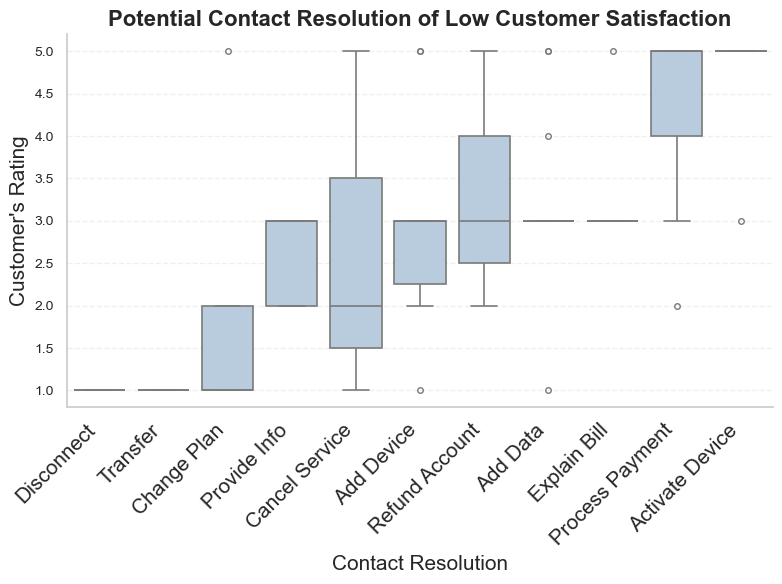

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Seaborn style
sns.set(style="whitegrid")

# ➕ Step 1: Compute means per category
mean_order = (
    df.groupby('Contact Resolution')['Overall Experience?']
    .mean()
    .sort_values()
    .index
)

# ➕ Step 2: Plot sorted boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=df,
    x='Contact Resolution',
    y='Overall Experience?',
    order=mean_order,           # 🔁 Sort by mean
    color='#b3cde3',
    linewidth=1.2,
    fliersize=4,
)

# Labels and formatting
ax.set_title("Potential Contact Resolution of Low Customer Satisfaction", fontsize=16, weight='bold')
ax.set_xlabel("Contact Resolution", fontsize=15)
ax.set_ylabel("Customer's Rating", fontsize=15)
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [124]:
df.groupby('Self-Service Channel Used?')['Overall Experience?'].mean().sort_values()

Self-Service Channel Used?
App           2.235294
Web           2.250000
IVR           2.937500
No Attempt    3.149254
Name: Overall Experience?, dtype: float64

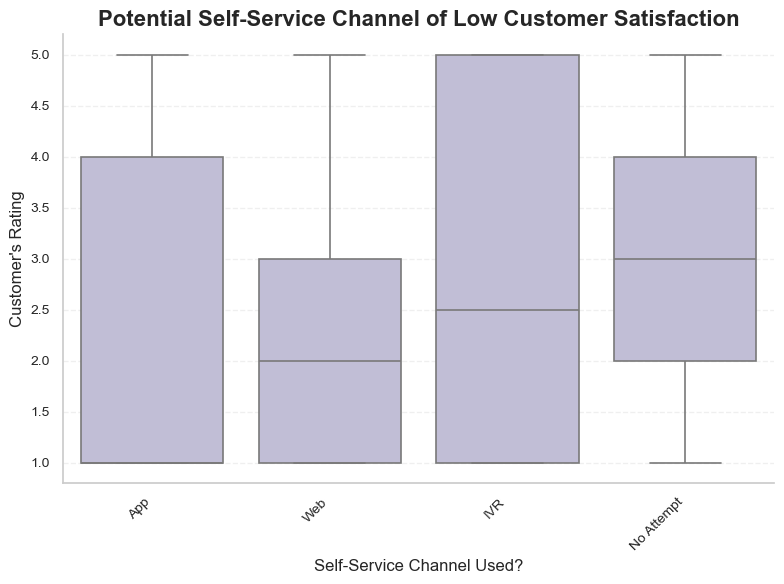

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Seaborn style
sns.set(style="whitegrid")

# ➕ Step 1: Compute means per category
mean_order = (
    df.groupby('Self-Service Channel Used?')['Overall Experience?']
    .mean()
    .sort_values()
    .index
)

# ➕ Step 2: Plot sorted boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=df,
    x='Self-Service Channel Used?',
    y='Overall Experience?',
    order=mean_order,           # 🔁 Sort by mean
    color='#bebada',
    linewidth=1.2,
    fliersize=4,
)

# Labels and formatting
ax.set_title("Potential Self-Service Channel of Low Customer Satisfaction", fontsize=16, weight='bold')
ax.set_xlabel("Self-Service Channel Used?", fontsize=12)
ax.set_ylabel("Customer's Rating", fontsize=12)
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [130]:
df.groupby('Contact Channel')['Overall Experience?'].mean().sort_values()

Contact Channel
Voice    2.745455
Chat     3.303030
Name: Overall Experience?, dtype: float64

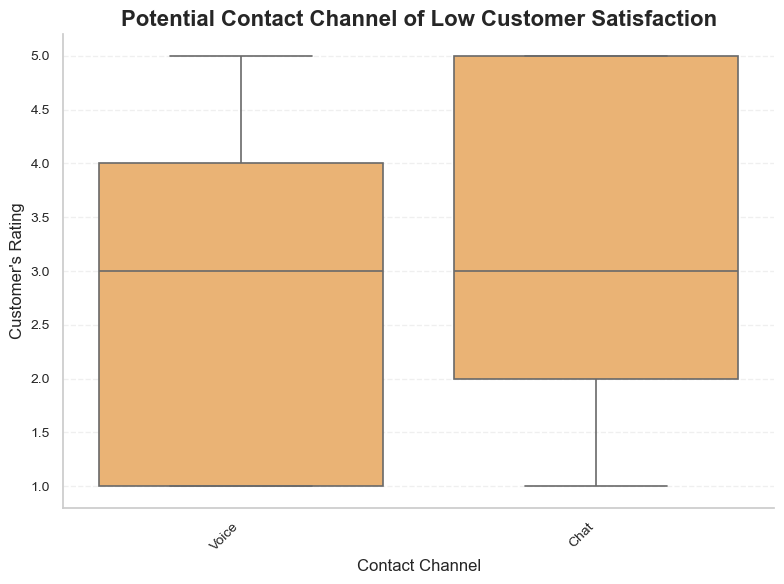

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Seaborn style
sns.set(style="whitegrid")

# ➕ Step 1: Compute means per category
mean_order = (
    df.groupby('Contact Channel')['Overall Experience?']
    .mean()
    .sort_values()
    .index
)

# ➕ Step 2: Plot sorted boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=df,
    x='Contact Channel',
    y='Overall Experience?',
    order=mean_order,           # 🔁 Sort by mean
    color='#fdb462',
    linewidth=1.2,
    fliersize=4,
)

# Labels and formatting
ax.set_title("Potential Contact Channel of Low Customer Satisfaction", fontsize=16, weight='bold')
ax.set_xlabel("Contact Channel", fontsize=12)
ax.set_ylabel("Customer's Rating", fontsize=12)
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

### Correlation analysis

Cramér’s V

In [289]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(df, col1, col2):
    # Create contingency table
    contingency = pd.crosstab(df[col1], df[col2])

    # Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency)

    # Cramér's V calculation
    n = contingency.sum().sum()
    phi2 = chi2 / n
    r, k = contingency.shape
    v = np.sqrt(phi2 / min(r - 1, k - 1))

    return v

In [377]:
v = cramers_v(df, 'Contact Resolution', 'Overall Experience?')
print(f"Cramér's V for Contact Resolution is: {v:.3f}")

v = cramers_v(df, 'Contact Reason', 'Overall Experience?')
print(f"Cramér's V for Contact Reason is: {v:.3f}")

v = cramers_v(df, 'Self-Service Channel Used?', 'Overall Experience?')
print(f"Cramér's V for Self-Service Channel Use is: {v:.3f}")

v = cramers_v(df, 'Contact Channel', 'Overall Experience?')
print(f"Cramér's V for Contact Channel is: {v:.3f}")

v = cramers_v(df, 'Advisor Role', 'Overall Experience?')
print(f"Cramér's V for Advisor Role is: {v:.3f}")

v = cramers_v(df_contact_frequency, 'Contact_freq', 'Overall Experience?')
print(f"Cramér's V for Contact Frequency is: {v:.3f}")

v = cramers_v(df_contact_frequency, 'Issue Resolved?', 'Overall Experience?')
print(f"Cramér's V for Issue Resolved Progress is: {v:.3f}")

Cramér's V for Contact Resolution is: 0.612
Cramér's V for Contact Reason is: 0.437
Cramér's V for Self-Service Channel Use is: 0.367
Cramér's V for Contact Channel is: 0.257
Cramér's V for Advisor Role is: 0.597
Cramér's V for Contact Frequency is: 0.564
Cramér's V for Issue Resolved Progress is: 0.406


### Ordinal Regression

In [229]:
df_contact_frequency.rename(columns={'Count': 'Contact_freq'}, inplace=True)

In [233]:
import pandas as pd
import mord as m

# Example predictors: one categorical, one numeric
X = pd.get_dummies(df_contact_frequency[['Advisor Role', 'Contact Channel', 'Self-Service Channel Used?', 'Contact Reason', 'Contact Resolution']], drop_first=True)
X['Contact_freq'] = df_contact_frequency['Contact_freq']
# Target must be ordinal integers (e.g. satisfaction 1-5)
y = df_contact_frequency['Overall Experience?']

# Fit ordinal regression
model = m.LogisticAT()  # Proportional odds model
model.fit(X, y)

# Predict
predicted = model.predict(X)

In [235]:
# Show model coefficients (weights)
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients)

Advisor Role_Tier 2                      1.770853
Contact Channel_Voice                   -0.014029
Self-Service Channel Used?_IVR          -0.158316
Self-Service Channel Used?_No Attempt    1.045894
Self-Service Channel Used?_Web          -0.236765
Contact Reason_Billing Dispute           0.115671
Contact Reason_Billing Question         -0.095055
Contact Reason_Cancel Service            0.052325
Contact Reason_Change Plan              -3.158749
Contact Reason_Device Question           1.645362
Contact Reason_Make a Payment            0.901963
Contact Reason_Service Question         -0.758390
Contact Resolution_Add Data              1.196804
Contact Resolution_Add Device            0.551120
Contact Resolution_Cancel Service       -0.386287
Contact Resolution_Change Plan          -0.277194
Contact Resolution_Disconnect           -2.668922
Contact Resolution_Explain Bill          0.207262
Contact Resolution_Process Payment       1.207160
Contact Resolution_Provide Info         -0.703752


In [237]:
from sklearn.metrics import classification_report

print(classification_report(y, predicted))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        37
           2       0.56      0.26      0.36        19
           3       0.50      0.81      0.62        42
           4       0.12      0.07      0.09        15
           5       0.83      0.67      0.74        30

    accuracy                           0.66       143
   macro avg       0.60      0.54      0.55       143
weighted avg       0.67      0.66      0.64       143



## high contact volume

In [146]:
pd.crosstab(df['Self-Service Channel Used?'], df['Contact Reason'])

Contact Reason,Add Services,Billing Dispute,Billing Question,Cancel Service,Change Plan,Device Question,Make a Payment,Service Question
Self-Service Channel Used?,,,,,,,,
App,15,0,0,1,3,0,11,4
IVR,5,0,0,1,2,0,8,0
No Attempt,2,17,30,5,1,7,2,3
Web,0,0,0,1,0,1,0,6


In [148]:
pd.crosstab(df['Self-Service Channel Used?'], df['Contact Resolution'])

Contact Resolution,Activate Device,Add Data,Add Device,Cancel Service,Change Plan,Disconnect,Explain Bill,Process Payment,Provide Info,Refund Account,Transfer
Self-Service Channel Used?,,,,,,,,,,,
App,0,0,0,0,3,2,0,10,4,0,15
IVR,0,1,1,0,1,3,0,7,0,0,3
No Attempt,7,0,3,3,0,5,5,2,3,39,0
Web,0,0,0,0,0,3,1,0,4,0,0


### Contact_frequency analysis

In [71]:
df_contact_frequency.rename(columns={'Count': 'Contact_freq'}, inplace=True)
df_contact_frequency['Contact_freq'] = df_contact_frequency['Contact_freq'].astype('object')

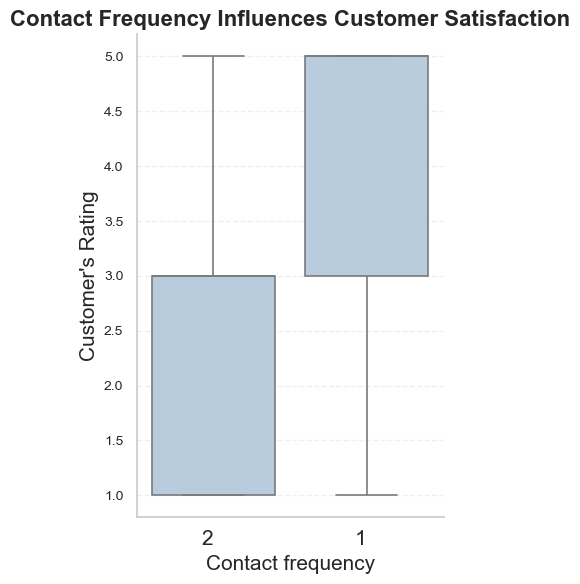

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Seaborn style
sns.set(style="whitegrid")

# ➕ Step 1: Compute means per category
mean_order = (
    df_contact_frequency.groupby('Contact_freq')['Overall Experience?']
    .mean()
    .sort_values()
    .index
)

# ➕ Step 2: Plot sorted boxplot
plt.figure(figsize=(4, 6))
ax = sns.boxplot(
    data=df_contact_frequency,
    x='Contact_freq',
    y='Overall Experience?',
    order=mean_order,           # 🔁 Sort by mean
    color='#b3cde3',
    linewidth=1.2,
    fliersize=4,
)

# Labels and formatting
ax.set_title("Contact Frequency Influences Customer Satisfaction", fontsize=16, weight='bold')
ax.set_xlabel("Contact frequency", fontsize=15)
ax.set_ylabel("Customer's Rating", fontsize=15)
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(ha='right', fontsize=15)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [221]:
my_data = pd.crosstab(df_contact_frequency['Contact_freq'], df_contact_frequency['Contact Reason'])
my_data

Contact Reason,Add Services,Billing Dispute,Billing Question,Cancel Service,Change Plan,Device Question,Make a Payment,Service Question
Contact_freq,,,,,,,,
1,0,0,0,3,6,6,17,9
2,40,17,30,5,0,2,4,4


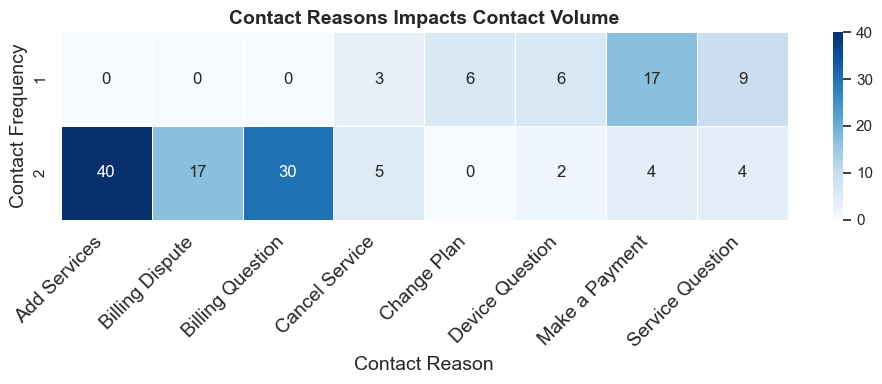

In [223]:
# Create a custom heatmap that highlights zeros with a specific color
import numpy as np

# Create a mask to highlight zeros
mask_zeros = my_data == 0

# Create a custom colormap that starts with the zero highlight color
from matplotlib.colors import ListedColormap

# Main colormap for non-zero values
#main_cmap = sns.light_palette("navy", as_cmap=True)
main_cmap='Blues'

# Create the heatmap with mask
plt.figure(figsize=(10, 4))
sns.heatmap(my_data, annot=True, fmt='d', cmap=main_cmap, cbar=True, linewidths=0.5, linecolor='white')

# Overlay custom highlight for zeros
#highlight_color = '#b3cde3'
#for y in range(df.shape[0]):
#    for x in range(df.shape[1]):
#        if mask_zeros.iloc[y, x]:
#            plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color=highlight_color, edgecolor='white', lw=0))

plt.title("Contact Reasons Impacts Contact Volume", fontsize=14, weight='bold')
plt.xlabel("Contact Reason", fontsize=14)
plt.ylabel("Contact Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.tight_layout()
plt.show()

In [225]:
my_data = pd.crosstab(df_contact_frequency['Contact_freq'], df_contact_frequency['Contact Resolution'])
my_data

Contact Resolution,Activate Device,Add Data,Add Device,Cancel Service,Change Plan,Disconnect,Explain Bill,Process Payment,Provide Info,Refund Account,Transfer
Contact_freq,,,,,,,,,,,
1,6,1,2,1,4,0,1,17,9,0,0
2,1,12,8,2,0,13,5,2,2,39,18


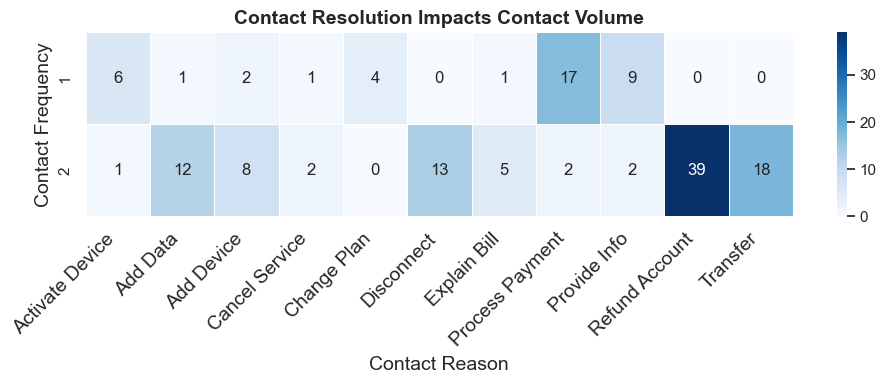

In [227]:
# Create a custom heatmap that highlights zeros with a specific color
import numpy as np

# Create a mask to highlight zeros
mask_zeros = my_data == 0

# Create a custom colormap that starts with the zero highlight color
from matplotlib.colors import ListedColormap

# Main colormap for non-zero values
#main_cmap = sns.light_palette("navy", as_cmap=True)
main_cmap='Blues'

# Create the heatmap with mask
plt.figure(figsize=(10, 4))
sns.heatmap(my_data, annot=True, fmt='d', cmap=main_cmap, cbar=True, linewidths=0.5, linecolor='white')

# Overlay custom highlight for zeros
#highlight_color = '#b3cde3'
#for y in range(df.shape[0]):
#    for x in range(df.shape[1]):
#        if mask_zeros.iloc[y, x]:
#            plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color=highlight_color, edgecolor='white', lw=0))

plt.title("Contact Resolution Impacts Contact Volume", fontsize=14, weight='bold')
plt.xlabel("Contact Reason", fontsize=14)
plt.ylabel("Contact Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.tight_layout()
plt.show()

In [85]:
pd.crosstab(df_contact_frequency['Contact_freq'], df_contact_frequency['Self-Service Channel Used?'])

Self-Service Channel Used?,App,IVR,No Attempt,Web
Contact_freq,,,,
1,17,10,9,5
2,17,6,58,3


In [97]:
pd.crosstab(df_contact_frequency['Contact_freq'], df_contact_frequency['Advisor Role'])

Advisor Role,Tier 1,Tier 2
Contact_freq,,
1,21,20
2,53,49


In [107]:
res = pd.crosstab(df_contact_frequency['Contact_freq'], df_contact_frequency['Contact Channel'])
print(res)
res / res.sum().sum()

Contact Channel  Chat  Voice
Contact_freq                
1                  25     16
2                   8     94


Contact Channel,Chat,Voice
Contact_freq,,
1,0.174825,0.111888
2,0.055944,0.657343


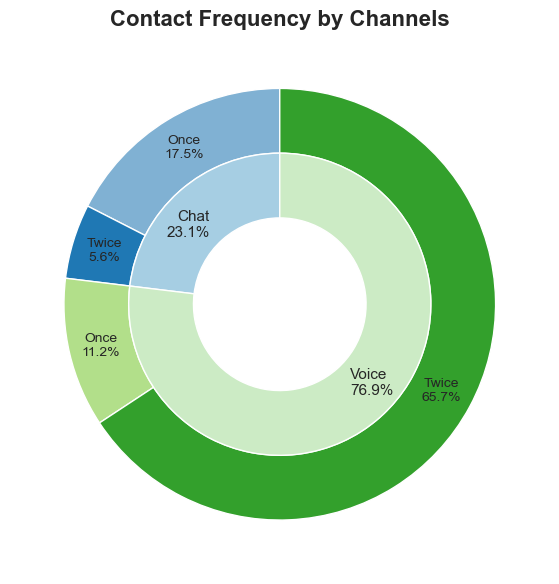

In [183]:
outer_colors = [
    '#80b1d3',
    '#1f78b4',  # Blue (Chat Twice)
    '#b2df8a',  # Light green (Voice Once)
    '#33a02c'   # Green (Voice Twice)
]

inner_colors = [
    '#a6cee3',   
    '#ccebc5' 
]

# Merge label and percentage for outer ring
def make_autopct_with_labels(labels):
    def my_autopct(pct):
        index = int(round(pct * len(labels) / 100.0))
        if index >= len(labels):  # Handle edge case on rounding
            index = len(labels) - 1
        return f'{labels[index]}\n{pct:.1f}%'
    return my_autopct

# Custom autopct to use the actual data order
def merged_labels_autopct(pct, all_vals):
    absolute = int(round(pct * sum(all_vals) / 100.0))
    return f'{pct:.1f}%'

# Plot with merged labels and percentages
fig, ax = plt.subplots(figsize=(8, 6))

# Outer ring
wedges, texts, autotexts = ax.pie(
    outer_sizes,
    radius=1,
    labels=None,
    colors=outer_colors,
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='white'),
    autopct=lambda pct: merged_labels_autopct(pct, outer_sizes),
    pctdistance=0.85
)

# Add custom merged label + % as annotations manually
for i, a in enumerate(autotexts):
    a.set_text(f'{outer_labels[i]}\n{a.get_text()}')
    a.set_fontsize(10)

# Inner ring
ax.pie(
    inner_sizes,
    radius=0.7,
    labels=[f'{label}\n{size/sum(inner_sizes)*100:.1f}%' for label, size in zip(inner_labels, inner_sizes)],
    labeldistance=0.7,
    colors=inner_colors,
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

# Title and formatting
#ax.set(aspect="equal", title='Contact Frequency by Channels')
ax.set_title("Contact Frequency by Channels", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# Comparing multiple contacts from the same customers

In [431]:
# Get duplicate rows based on 'Account Number'
duplicates = df_contact_frequency[df_contact_frequency['Account Number'].duplicated(keep=False)]
    
# Sort by 'Account Number' descending
duplicates_sort = duplicates.sort_values(by=['Account Number', 'Contact Date (mm/dd/yyyy)'], ascending=True)
duplicates_sort.index = range(duplicates_sort.shape[0])

In [403]:
import pandas as pd

# Filter for customers who contacted 2 or more times
df_filtered = duplicates_sort[duplicates_sort['Contact_freq'] >= 2]

# Sort by account and contact date to ensure correct ordering
df_filtered = df_filtered.sort_values(by=['Account Number', 'Contact Date (mm/dd/yyyy)'])

# Calculate the change in 'Overall Experience?' from first to last contact
experience_change = (
    df_filtered.groupby('Account Number')['Overall Experience?']
    .apply(lambda x: x.iloc[-1] - x.iloc[0] if len(x) > 1 else None)
    .dropna()
)

# Count total customers
total_tracked = len(experience_change)

# Calculate categories
improved_count = (experience_change > 0).sum()
same_count = (experience_change == 0).sum()
worsened_count = (experience_change < 0).sum()

# Calculate percentages
percent_improved = (improved_count / total_tracked) * 100
percent_same = (same_count / total_tracked) * 100
percent_worsened = (worsened_count / total_tracked) * 100

# Display the results
print(f"Total tracked customers: {total_tracked}")
print(f"✅ Percentage Overall Experience improved: {percent_improved:.1f}%")
print(f"➖ Percentage Overall Experience stayed the same: {percent_same:.1f}%")
print(f"🔻 Percentage Overall Experience worsened: {percent_worsened:.1f}%")

Total tracked customers: 51
✅ Percentage Overall Experience improved: 64.7%
➖ Percentage Overall Experience stayed the same: 11.8%
🔻 Percentage Overall Experience worsened: 23.5%


In [443]:
df_contact_frequency['Overall Experience?'].mean()

2.874125874125874

In [441]:
df_contact_frequency.groupby('Contact_freq')['Overall Experience?'].mean()

Contact_freq
1    3.853659
2    2.480392
Name: Overall Experience?, dtype: float64

# What were the pain points during the end-to-end customer journey?

## Self-Service Channel Used? vs. Contact Reason

In [458]:
res = pd.crosstab(df_contact_frequency['Contact Reason'], df_contact_frequency['Self-Service Channel Used?'])
res

Self-Service Channel Used?,App,IVR,No Attempt,Web
Contact Reason,,,,
Add Services,15,5,2,0
Billing Dispute,0,0,17,0
Billing Question,0,0,30,0
Cancel Service,1,1,5,1
Change Plan,3,2,1,0
Device Question,0,0,7,1
Make a Payment,11,8,2,0
Service Question,4,0,3,6


In [470]:
def highlight_zeros(val):
    return 'background-color: #b3cde3' if val == 0 else ''

styled_df = res.style.applymap(highlight_zeros)
styled_df

C:\Users\20244650\AppData\Local\Temp\ipykernel_4120\2327977909.py:4: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = res.style.applymap(highlight_zeros)


Self-Service Channel Used?,App,IVR,No Attempt,Web
Contact Reason,,,,
Add Services,15,5,2,0
Billing Dispute,0,0,17,0
Billing Question,0,0,30,0
Cancel Service,1,1,5,1
Change Plan,3,2,1,0
Device Question,0,0,7,1
Make a Payment,11,8,2,0
Service Question,4,0,3,6


In [456]:
a = df_contact_frequency['Self-Service Channel Used?'].value_counts()
a / sum(a)

Self-Service Channel Used?
No Attempt    0.536
App           0.272
IVR           0.128
Web           0.064
Name: count, dtype: float64

## Unresolved or Repeated Issues

In [66]:
import pandas as pd

path = 'C:/Users/20244650/OneDrive - TU Eindhoven/files/others/Positions/Insight Lead/Case Study/Case/'
d = pd.read_excel(path + 'CNX Case Study Data Workbook 4_processed.xlsx', sheet_name='Merged')

In [22]:
res = pd.crosstab(d['Issue Resolved?'], d['Contact_freq'])
res

Contact_freq,1,2
Issue Resolved?,,
No,2,1
"No, but expect it to be resolved",0,70
Yes,39,31


In [26]:
# Filter only customers who contacted twice
twice_customers = d[d['Contact_freq'] == 2].copy()

# Sort by customer and contact date to determine order
twice_customers = twice_customers.sort_values(by=['Account Number', 'Contact Date (mm/dd/yyyy)'])

# Mark first and second contact per customer
twice_customers['Contact Sequence'] = twice_customers.groupby('Account Number').cumcount() + 1
twice_customers['Contact Sequence Label'] = twice_customers['Contact Sequence'].map({1: 'First Contact', 2: 'Second Contact'})

In [38]:
df = pd.merge(d, twice_customers, on='Interaction ID', how='left')

In [68]:
mapping = {
    'Yes': 1,
    'No, but expect it to be resolved': 0.5,
    'No': 0
}

df = d
df['Service Progress'] = df['Issue Resolved?'].map(mapping)

In [76]:
res = pd.crosstab(df['Contact Sequence Label'], df['Issue Resolved?'])
res

Issue Resolved?,No,"No, but expect it to be resolved",Yes
Contact Sequence Label,,,
First Contact,0,51,0
Second Contact,1,19,31


In [88]:
20/51

0.39215686274509803

In [97]:
sub = df[df['Contact Sequence Label'] == 'Second Contact']
pd.crosstab(sub['Contact Reason'], sub['Issue Resolved?'])

Issue Resolved?,No,"No, but expect it to be resolved",Yes
Contact Reason,,,
Add Services,0,0,20
Billing Dispute,0,7,0
Billing Question,1,10,4
Cancel Service,0,2,2
Device Question,0,0,1
Make a Payment,0,0,2
Service Question,0,0,2


In [99]:
17/19

0.8947368421052632

In [102]:
2/19

0.10526315789473684

## Contact Reason

In [230]:
res = pd.crosstab(df['Contact Reason'], df['Issue Resolved?'])
res['No / On progress'] = res['No'] + res['No, but expect it to be resolved']
res['Total'] = res['Yes'] + res['No / On progress']
res = res.sort_values(by='No / On progress')

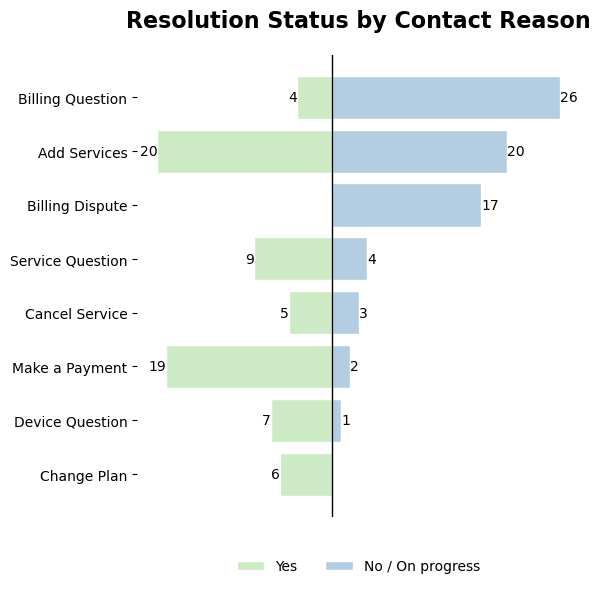

In [232]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting with added count labels for both sides
plt.figure(figsize=(6, 6), facecolor='none')
y_pos = range(len(res))

# Bars
plt.barh(y=y_pos, width=-res['Yes'], color='#ccebc5', edgecolor='white', label='Yes')
plt.barh(y=y_pos, width=res['No / On progress'], color='#b3cde3', edgecolor='white', label='No / On progress')

# Annotations for both sides
for i, (yes, no) in enumerate(zip(res['Yes'], res['No / On progress'])):
    if yes > 0:
        plt.text(-yes, i, str(yes), va='center', ha='right', fontsize=10)
    if no > 0:
        plt.text(no, i, str(no), va='center', ha='left', fontsize=10)

# Styling
plt.yticks(ticks=y_pos, labels=list(res.index))
plt.axvline(0, color='black', linewidth=1)
plt.title("Resolution Status by Contact Reason", fontsize=16, weight='bold', pad=20)
plt.legend(loc='lower center', ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.15))
plt.xticks([])
plt.box(False)
plt.tight_layout()
plt.show()

In [234]:
res = pd.crosstab(df['Contact Resolution'], df['Issue Resolved?'])
res['No / On progress'] = res['No'] + res['No, but expect it to be resolved']
res['Total'] = res['Yes'] + res['No / On progress']
res = res.sort_values(by='No / On progress')
res

Issue Resolved?,No,"No, but expect it to be resolved",Yes,No / On progress,Total
Contact Resolution,,,,,
Activate Device,0,0,7,0,7
Add Data,0,0,13,0,13
Add Device,0,0,10,0,10
Cancel Service,0,0,3,0,3
Change Plan,0,0,4,0,4
Process Payment,0,0,19,0,19
Explain Bill,1,0,5,1,6
Provide Info,2,0,9,2,11
Disconnect,0,13,0,13,13


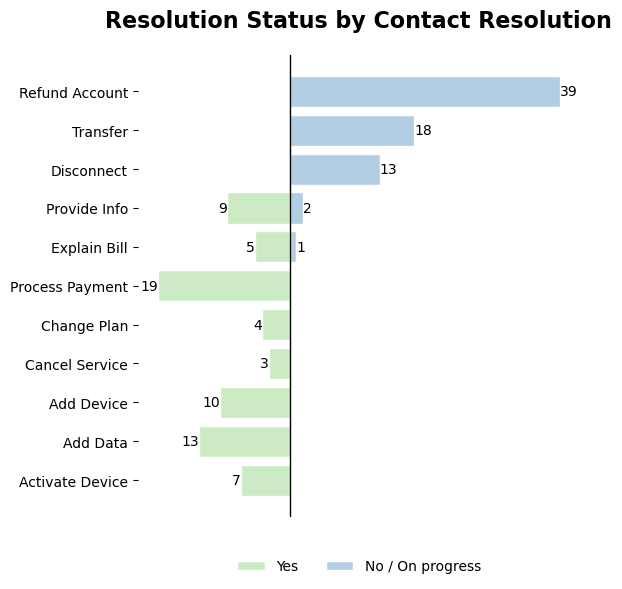

In [236]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting with added count labels for both sides
plt.figure(figsize=(6, 6), facecolor='none')
y_pos = range(len(res))

# Bars
plt.barh(y=y_pos, width=-res['Yes'], color='#ccebc5', edgecolor='white', label='Yes')
plt.barh(y=y_pos, width=res['No / On progress'], color='#b3cde3', edgecolor='white', label='No / On progress')

# Annotations for both sides
for i, (yes, no) in enumerate(zip(res['Yes'], res['No / On progress'])):
    if yes > 0:
        plt.text(-yes, i, str(yes), va='center', ha='right', fontsize=10)
    if no > 0:
        plt.text(no, i, str(no), va='center', ha='left', fontsize=10)

# Styling
plt.yticks(ticks=y_pos, labels=list(res.index))
plt.axvline(0, color='black', linewidth=1)
plt.title("Resolution Status by Contact Resolution", fontsize=16, weight='bold', pad=20)
plt.legend(loc='lower center', ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.15))
plt.xticks([])
plt.box(False)
plt.tight_layout()
plt.show()